In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import glob as glob
import os
%matplotlib inline
import warnings
from matplotlib.ticker import FormatStrFormatter
warnings.filterwarnings('ignore')

In [9]:
def to_seconds(timestamp):
    ts = timestamp.split(':')
    try: return float(float(ts[0])*60*60 + float(ts[1])*60 + float(ts[2]))
    except: return float(0)

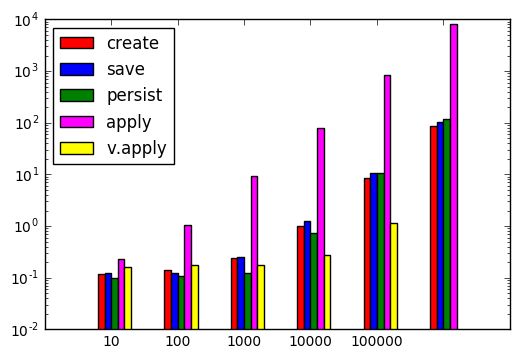

In [108]:
jobs   = ['RPCs', 'create', 'save', 'persist', 'v.apply', 'apply']
files  = ['10000', '100000']

with open('../results/summary.txt') as f:
    df = pd.read_csv(f, names=['job', 'nfiles', 'time', 'runtime'])
    df['runtime'] = df['runtime'].apply(to_seconds)

fig, ax = plt.subplots(1, 1)
shift = -.2
index = 0
jobs = ["create", "save", "persist", "apply", "v.apply"]
colr = ["red", "blue", "green", "magenta", "yellow"]
for job in jobs:
    d = df[df['job'] == job]
    x = np.arange(len(d))
    ax.bar(x + shift, d['runtime'], width=0.1, label=job, color=colr[index])
    shift += 0.1
    index += 1
ax.set_yscale('log')
ax.legend(loc='upper left')

labels = [""]
for n in d['nfiles']:
    labels.append(n)
ax.set_xticklabels(labels)
#df.tail(20)
